<div style="text-align: center; font-size: 2em; color: lightblue; font-weight: bold;"> Wellbeing at Trinity Christian College: A Machine Learning Analysis of Survey Data </div>

<span style="color: #4682B4; font-weight: bold;">1. Introductory paragraph</span>

Trinity Christian College is a small private liberal arts college in Palos Heights, Illinois known for its close knit community, strong academic programs, and faith and service. They invited students, faculty, and staff to take part in a voluntary study to aim to understand the overall wellbeing on Trinity's campus. The survey asked students about their mental health, disabilities, how involved they are in campus activities, and whether they participate in events. Faculty and staff answered another set of questions giving their perspectives on the overall wellbeing of the college community. With this we will be able to answer the question: **Which factors (demographics, mental health, disabilities, or participation) in campus activities are linked to overall wellbeing in Trinity’s students, faculty, and staff?** This project will first give an overview of the people who took the survey and their basic demographics. It will look at how mental health and disabilities relate to wellbeing and it will examine how participating in campus activities influences overall wellbeing at Trinity. By looking at all these factors together we can better understand what helps students, faculty, and staff feel their best and succeed as individuals and as a community.

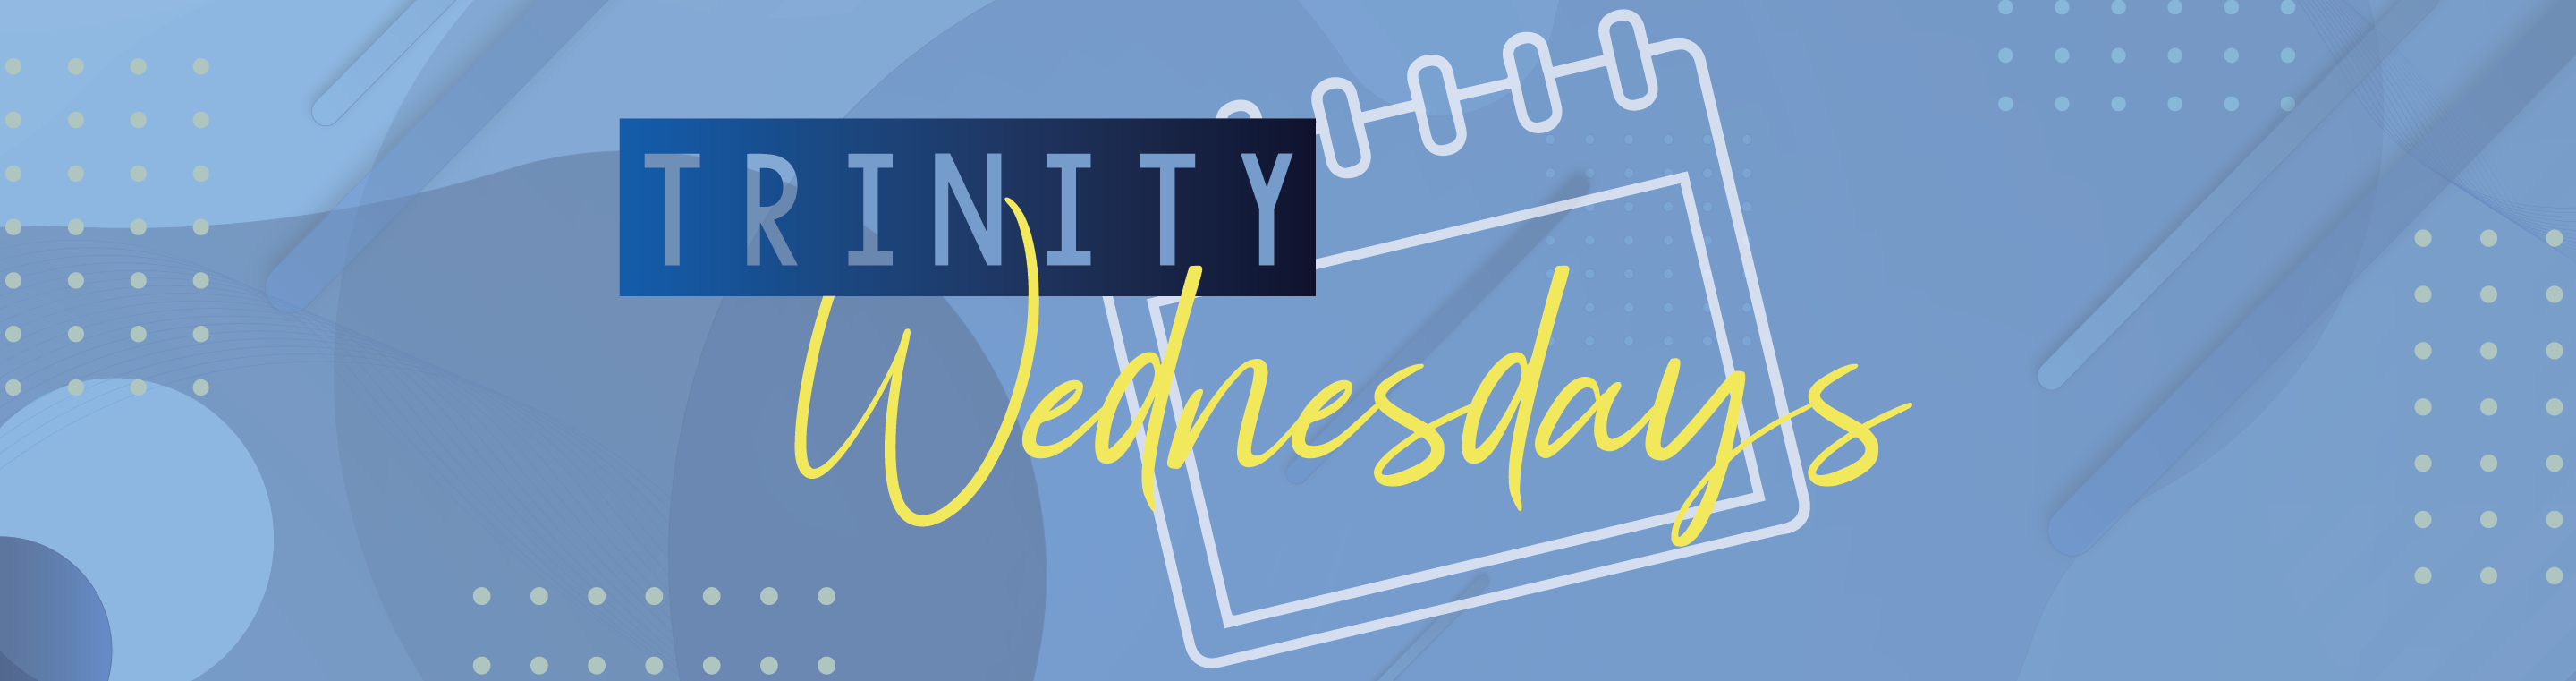



<span style="color: #4682B4; font-weight: bold;">2. Data source information</span>

The data for this study comes from surveys administered to students, faculty, and staff at Trinity Christian College by Dr. Jessica Clevering and her co-investigators. Participants voluntarily shared information about their demographics, wellbeing, participation in campus activities, and opinions about institutional wellbeing. The data collection process is considered reliable and trustworthy because it follows ethical guidelines under the supervision of the college’s Institutional Review Board which makes sure that all responses are anonymous and confidential. This helps protect participants and adds credibility to the dataset. For students, the dataset includes detailed demographic information, self-reported measures of wellbeing, and records of involvement in a variety of campus activities. For faculty and staff, it captures their perspectives on institutional wellbeing, including aspects related to campus culture, support, and engagement. Together, this information provides a broad and detailed view of the experiences and wellbeing of different groups within the college community. While the dataset is quantitative qualitative responses could offer insight into individual experiences and perceptions. The dataset overall contains the perfect information needed to study trends in wellbeing and engagement at Trinity Christian College. It allows for comparisons across students, faculty, and staff and provides a solid foundation for understanding how different groups experience and contribute to the wellbeing of the college community.

<span style="color: #4682B4; font-weight: bold;">3. Data cleaning</span>

We added our dataset to the notebook and imported it using pandas read_csv() method so that we could view and work with the data.

In [1]:
import pandas as pd
data = pd.read_csv('TrinityWellbeingData.csv')

I now went ahead and used **"data.info()"** because it shows a summary of the dataset. This will include things such as column names, data types, and any missing values. This makes us more familar with what we will be working with

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 37 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [3]:
data.isnull().sum()

Informed Consent Information  Principal Investigator: Dr. Jessica Clevering Co-Investigators: Myleigh Halmon, Gianna Rizzone, and Wynter O’SullivanFor Students: You are being invited to participate in research to better understand wellbeing among Trinity students, faculty, and staff. The data will be used for institutional assessment and to explore future wellbeing interventions. Questions will include things like basic demographic questions, questions about disabilities and mental health, measures of wellbeing, participation in campus activities, and use of Wellbeing Wednesdays. It will likely take about 15 minutes to complete the survey.For Faculty and Staff: You are being invited to participate in research to better understand wellbeing among Trinity students, faculty, and staff. The data will be used for institutional assessment and to explore future wellbeing interventions. Questions will include things like basic demographic questions, measures of wellbeing, and your view on inst

Above you can see that we used **"data.isnull().sum()"** this checks for missing values in the dataframe . The **isnull()** part marks each cell as True if it is missing and False if it is not. **The sum()** part adds up the True values for each column, showing the total number of missing values per column.

In [4]:
data_clean = data[data['Are you a student, staff member, or faculty member at Trinity?'].notna()]

students_clean = data_clean[data_clean['Are you a student, staff member, or faculty member at Trinity?'].str.strip() == 'Student']
staff_clean    = data_clean[data_clean['Are you a student, staff member, or faculty member at Trinity?'].str.strip() == 'Staff']
faculty_clean  = data_clean[data_clean['Are you a student, staff member, or faculty member at Trinity?'].str.strip() == 'Faculty']


In this case I decided to split the dataset into three separate groups those being Students, Staff, and Faculty because some survey questions are only relevant to certain groups. To make sure the data was clean, I first removed any rows where the role question was left blank using **notna()** since working with missing values could cause errors when processing the text. After that, I filtered the cleaned dataset into three separate datasets this approach will help me analyze each group making sure that the responses I look at are relevant helping improve the accuracy and clarity of the analysis.

<span style="color: #4682B4; font-weight: bold;">4. Feature selection</span>

Now we will begin to dive deeper and remove features we don’t need to focus on within each category of students, faculty and staff.

In [5]:
import numpy as np

Above we used **import numpy as np** to load the NumPy math library the your Python program. Importing is important because it gives a fast tool for numerical computations and array operations that plain Python cannot handle. It also gives access to a range of mathematical functions and is compatible with other data science libraries.

In the steps below, I reduced the datasets **students_clean**, **staff_clean**, and **faculty_clean** by keeping only the survey questions that were relevant to each group. I first created lists called **columns_kept**, **columns_kept2**, and **columns_kept3** these contain the names of the relevant columns for each category. These lists were then used to filter the datasets making simpler tables that include only the selected survey questions.

In [6]:
columns_kept = [
    "How would you describe yourself?",
    "What is your age?",
    "What is the highest level of education you have completed?",
    "Overall, how satisfied are you with life as a whole these days?\xa0\xa0\xa0\xa0",
    "In general, I consider myself a happy person.",
    "In general, how would you rate your physical health?",
    "How would you rate your overall mental health? \xa0\xa0",
    "Overall, to what extent do you feel the things you do in your life are worthwhile?",
    "I am doing things now that will help me achieve my goals in life.",
    "I always act to promote good in all circumstances, even in difficult and challenging situations.",
    "I am always able to give up some happiness now for greater happiness later.",
    "I am content with my friendships and relationships.",
    "I have people in my life I can talk to about things that really matter.",
    "My family has enough money to live a truly decent life.",
    "How often do you worry about safety, food, or housing?",
    "Are you a student, staff member, or faculty member at Trinity?"
]

students_clean = students_clean[columns_kept]
students_clean


,How would you describe yourself?,What is your age?,What is the highest level of education you have completed?,"Overall, how satisfied are you with life as a whole these days?","In general, I consider myself a happy person.","In general, how would you rate your physical health?",How would you rate your overall mental health?,"Overall, to what extent do you feel the things you do in your life are worthwhile?",I am doing things now that will help me achieve my goals in life.,"I always act to promote good in all circumstances, even in difficult and challenging situations.",I am always able to give up some happiness now for greater happiness later.,I am content with my friendships and relationships.,I have people in my life I can talk to about things that really matter.,My family has enough money to live a truly decent life.,"How often do you worry about safety, food, or housing?","Are you a student, staff member, or faculty member at Trinity?"
0,Male,22.0,An associate degree,8.0,7.0,7.0,7.0,8.0,8.0,7.0,6.0,7.0,7.0,7.0,8.0,Student
1,Female,20.0,Some college but no degree,7.0,7.0,6.0,5.0,8.0,9.0,9.0,8.0,8.0,9.0,7.0,9.0,Student
2,Female,19.0,Some college but no degree,6.0,8.0,9.0,8.0,8.0,10.0,9.0,8.0,9.0,8.0,9.0,10.0,Student
3,Female,22.0,Some college but no degree,8.0,8.0,7.0,6.0,6.0,9.0,7.0,7.0,8.0,10.0,10.0,2.0,Student
4,Male,22.0,High school diploma or equivalent,9.0,9.0,8.0,8.0,8.0,9.0,7.0,5.0,8.0,9.0,9.0,10.0,Student
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,Female,19.0,High school diploma or equivalent,7.0,7.0,6.0,7.0,8.0,8.0,8.0,9.0,8.0,10.0,7.0,10.0,Student
449,Female,20.0,Some college but no degree,8.0,10.0,10.0,8.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,Student
450,Female,34.0,An associate degree,10.0,10.0,6.0,6.0,9.0,10.0,10.0,10.0,10.0,10.0,8.0,6.0,Student
452,Female,34.0,High school diploma or equivalent,8.0,9.0,6.0,5.0,10.0,10.0,10.0,8.0,10.0,10.0,7.0,0.0,Student


In [7]:
columns_kept2 = [
    "How would you describe yourself?",
    "What is your age?",
    "What is the highest level of education you have completed?",
    "Overall, how satisfied are you with life as a whole these days?\xa0\xa0\xa0\xa0",
    "In general, I consider myself a happy person.",
    "In general, how would you rate your physical health?",
    "How would you rate your overall mental health? \xa0\xa0",
    "Overall, to what extent do you feel the things you do in your life are worthwhile?",
    "I am doing things now that will help me achieve my goals in life.",
    "I always act to promote good in all circumstances, even in difficult and challenging situations.",
    "I am always able to give up some happiness now for greater happiness later.",
    "I am content with my friendships and relationships.",
    "I have people in my life I can talk to about things that really matter.",
    "My family has enough money to live a truly decent life.",
    "How often do you worry about safety, food, or housing?",
    "Are you a student, staff member, or faculty member at Trinity?"
]

staff_clean = staff_clean[columns_kept2]
staff_clean



,How would you describe yourself?,What is your age?,What is the highest level of education you have completed?,"Overall, how satisfied are you with life as a whole these days?","In general, I consider myself a happy person.","In general, how would you rate your physical health?",How would you rate your overall mental health?,"Overall, to what extent do you feel the things you do in your life are worthwhile?",I am doing things now that will help me achieve my goals in life.,"I always act to promote good in all circumstances, even in difficult and challenging situations.",I am always able to give up some happiness now for greater happiness later.,I am content with my friendships and relationships.,I have people in my life I can talk to about things that really matter.,My family has enough money to live a truly decent life.,"How often do you worry about safety, food, or housing?","Are you a student, staff member, or faculty member at Trinity?"
25,Female,57.0,A bachelor’s degree,8.0,9.0,8.0,9.0,9.0,7.0,9.0,9.0,9.0,10.0,10.0,10.0,Staff
26,Male,NaN,A bachelor’s degree,6.0,7.0,5.0,6.0,4.0,3.0,8.0,7.0,4.0,4.0,5.0,5.0,Staff
27,Female,61.0,NaN,9.0,8.0,7.0,8.0,9.0,8.0,9.0,NaN,8.0,9.0,9.0,9.0,Staff
29,Female,22.0,A bachelor’s degree,10.0,10.0,10.0,10.0,10.0,9.0,8.0,9.0,9.0,10.0,8.0,7.0,Staff
33,Female,35.0,A postgraduate degree (such as a master’s degr...,7.0,7.0,6.0,5.0,10.0,8.0,10.0,8.0,6.0,10.0,8.0,10.0,Staff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,23.0,A bachelor’s degree,7.0,9.0,5.0,6.0,7.0,6.0,5.0,5.0,7.0,8.0,8.0,6.0,Staff
372,Male,49.0,NaN,9.0,10.0,9.0,9.0,9.0,10.0,9.0,8.0,6.0,6.0,9.0,10.0,Staff
381,Female,29.0,A bachelor’s degree,8.0,8.0,8.0,7.0,9.0,7.0,9.0,7.0,7.0,10.0,5.0,8.0,Staff
410,Male,48.0,An associate degree,9.0,8.0,6.0,9.0,9.0,8.0,8.0,7.0,9.0,10.0,6.0,8.0,Staff


In [8]:
columns_kept3 = [
    "How would you describe yourself?",
    "What is your age?",
    "What is the highest level of education you have completed?",
    "Overall, how satisfied are you with life as a whole these days?\xa0\xa0\xa0\xa0",
    "In general, I consider myself a happy person.",
    "In general, how would you rate your physical health?",
    "How would you rate your overall mental health? \xa0\xa0",
    "Overall, to what extent do you feel the things you do in your life are worthwhile?",
    "I am doing things now that will help me achieve my goals in life.",
    "I always act to promote good in all circumstances, even in difficult and challenging situations.",
    "I am always able to give up some happiness now for greater happiness later.",
    "I am content with my friendships and relationships.",
    "I have people in my life I can talk to about things that really matter.",
    "My family has enough money to live a truly decent life.",
    "How often do you worry about safety, food, or housing?",
    "Are you a student, staff member, or faculty member at Trinity?"
]

faculty_clean = faculty_clean[columns_kept3]
faculty_clean 


,How would you describe yourself?,What is your age?,What is the highest level of education you have completed?,"Overall, how satisfied are you with life as a whole these days?","In general, I consider myself a happy person.","In general, how would you rate your physical health?",How would you rate your overall mental health?,"Overall, to what extent do you feel the things you do in your life are worthwhile?",I am doing things now that will help me achieve my goals in life.,"I always act to promote good in all circumstances, even in difficult and challenging situations.",I am always able to give up some happiness now for greater happiness later.,I am content with my friendships and relationships.,I have people in my life I can talk to about things that really matter.,My family has enough money to live a truly decent life.,"How often do you worry about safety, food, or housing?","Are you a student, staff member, or faculty member at Trinity?"
7,Male,44.0,A postgraduate degree (such as a master’s degr...,6.0,7.0,8.0,7.0,8.0,8.0,8.0,8.0,8.0,10.0,9.0,7.0,Faculty
14,Female,41.0,A postgraduate degree (such as a master’s degr...,9.0,9.0,9.0,9.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,Faculty
18,Male,36.0,A postgraduate degree (such as a master’s degr...,7.0,9.0,8.0,7.0,9.0,8.0,8.0,7.0,4.0,3.0,7.0,9.0,Faculty
20,Male,39.0,A postgraduate degree (such as a master’s degr...,9.0,8.0,7.0,8.0,9.0,9.0,8.0,9.0,9.0,8.0,7.0,10.0,Faculty
51,Male,38.0,A postgraduate degree (such as a master’s degr...,5.0,5.0,7.0,7.0,9.0,9.0,9.0,9.0,10.0,10.0,10.0,9.0,Faculty
80,Female,43.0,A postgraduate degree (such as a master’s degr...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,10.0,Faculty
89,Female,NaN,A postgraduate degree (such as a master’s degr...,9.0,9.0,7.0,8.0,10.0,10.0,10.0,8.0,8.0,10.0,10.0,0.0,Faculty
93,Male,44.0,A postgraduate degree (such as a master’s degr...,8.0,7.0,8.0,7.0,7.0,7.0,6.0,9.0,7.0,10.0,10.0,0.0,Faculty
104,Female,71.0,A postgraduate degree (such as a master’s degr...,7.0,6.0,9.0,9.0,8.0,8.0,9.0,8.0,7.0,10.0,6.0,10.0,Faculty
114,Female,43.0,A postgraduate degree (such as a master’s degr...,9.0,9.0,3.0,7.0,9.0,9.0,9.0,8.0,8.0,9.0,8.0,10.0,Faculty


<span style="color: #4682B4; font-weight: bold;">5. Model selection and tuning</span>

<span style="color: #4682B4; font-weight: bold;">6. Explainability analysis*</span>

<span style="color: #4682B4; font-weight: bold;">7. Discussion</span>

<span style="color: #4682B4; font-weight: bold;">8. Conclusion</span>